<a href="https://colab.research.google.com/github/luisinamedran/Data-Science-I-/blob/main/ProyectoFinal/ProyectoDS_EntregaFinal_MedranL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Entrega Final
Archivo: `ProyectoDS_EntregaFinal_MedranL.ipynb`

---
📌**Abstract**

Este proyecto se basa en el conjunto de datos “Gym Members Exercise Dataset” disponible en Kaggle, conformado por 973 registros relacionados con la actividad física de distintos participantes. El dataset incluye variables que describen aspectos como la frecuencia cardíaca, las calorías quemadas, la duración de las sesiones de entrenamiento, el nivel de experiencia y el género, entre otras.

El objetivo principal del estudio es desarrollar un modelo de machine learning que permita abordar el problema planteado en el apartado siguiente.

En una fase inicial, se llevó a cabo la limpieza de los datos, junto con la detección y eliminación de valores atípicos y registros duplicados. Posteriormente, se profundizo en las siguientes etapas del proceso: preparación de datos, modelado, entrenamiento, prueba, validación, despliegue y mantenimiento del modelo.


---
🎯**Objetivo del proyecto**

Partiendo de un análisis descriptivo, este proyecto se enfoca en la implementación de un modelo de machine learning orientado a predecir la cantidad de calorías quemadas (Calories_Burned) durante una sesión de entrenamiento.

Para ello, se aplicarán técnicas de selección de características y reducción de dimensionalidad, seguidas del entrenamiento y validación de un modelo de regresión, utilizando métricas como R², MAE y RMSE para evaluar su desempeño.

a) R² (Coeficiente de determinación): mide qué porcentaje de la variabilidad de las calorías quemadas es explicado por el modelo.

b) MAE (Mean Absolute Error): calcula el error promedio absoluto entre los valores reales y los predichos.

c) RMSE (Root Mean Squared Error): mide el error cuadrático medio, penalizando más los errores grandes.

Un **modelo exitoso** será aquel que:

Obtenga un R² elevado (> 0.7),

Y mantenga valores bajos de MAE y RMSE, indicando predicciones precisas y consistentes.

El objetivo final es identificar los factores que más influyen en el gasto calórico y construir una herramienta predictiva capaz de estimar el rendimiento físico individual con base en datos objetivos y medibles.


---


👌**Exploracion descriptiva**

1) ¿Cómo se distribuye la duración promedio de las sesiones (Session_Duration) en horas?   

2) ¿Existe una relación entre la duración de la sesión (Session_Duration) y las calorías quemadas (Calories_Burned)?

3) ¿De qué manera influyen el nivel de experiencia (Experience_Level) y la frecuencia semanal de entrenamiento (Workout_Frequency) en el porcentaje de grasa corporal (Fat_Percentage)?
---

👌**Importacion de base de datos y librerias**


In [59]:
# Importacion de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# Importacion de base de datos
path_base = "https://raw.githubusercontent.com/luisinamedran/Data-Science-I-/refs/heads/main/Entrega%201/DataSet/gym_members_exercise_tracking.csv"
df = pd.read_csv(path_base)
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [61]:
# Identificacion de informacion de la base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

---

🚫**Missing values**

In [62]:
# Identificacion de valores faltantes
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


👉No se observan valores faltantes en la base de datos seleccionada.

---
📊**Visualizaciones y analisis de la exploracion descriptiva**

#### 1: ¿Cómo se distribuye la duración promedio de las sesiones en horas?

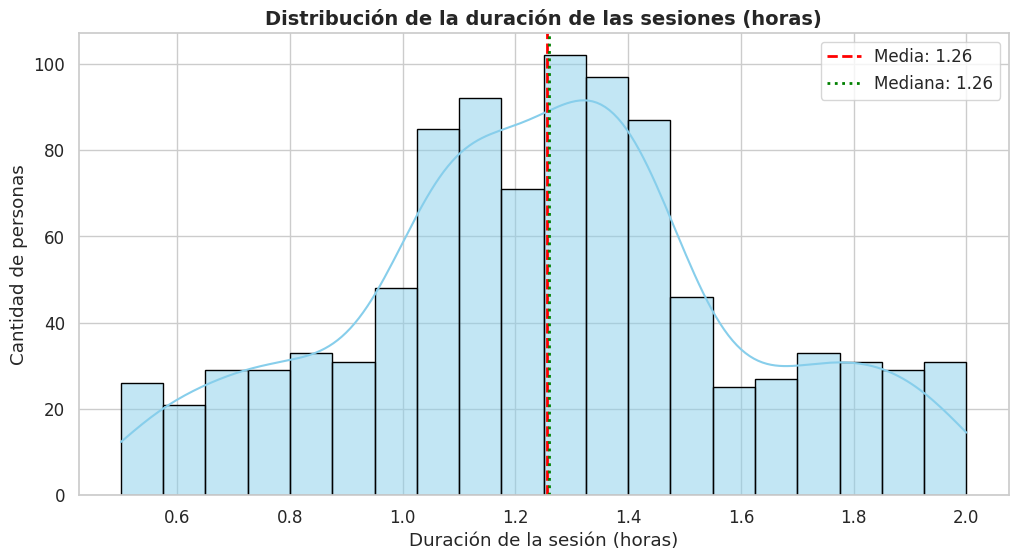

In [63]:

# Configuración de estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Visualización de la distribución de la duración de sesiones
plt.figure(figsize=(12,6))

# Histograma con densidad
sns.histplot(df["Session_Duration (hours)"], bins=20, kde=True, color="skyblue", edgecolor="black")

# Líneas de media y mediana
plt.axvline(df["Session_Duration (hours)"].mean(), color="red", linestyle="--", linewidth=2, label=f"Media: {df['Session_Duration (hours)'].mean():.2f}")
plt.axvline(df["Session_Duration (hours)"].median(), color="green", linestyle=":", linewidth=2, label=f"Mediana: {df['Session_Duration (hours)'].median():.2f}")

# Títulos y etiquetas
plt.title("Distribución de la duración de las sesiones (horas)", fontsize=14, fontweight="bold")
plt.xlabel("Duración de la sesión (horas)")
plt.ylabel("Cantidad de personas")
plt.legend()

plt.show()




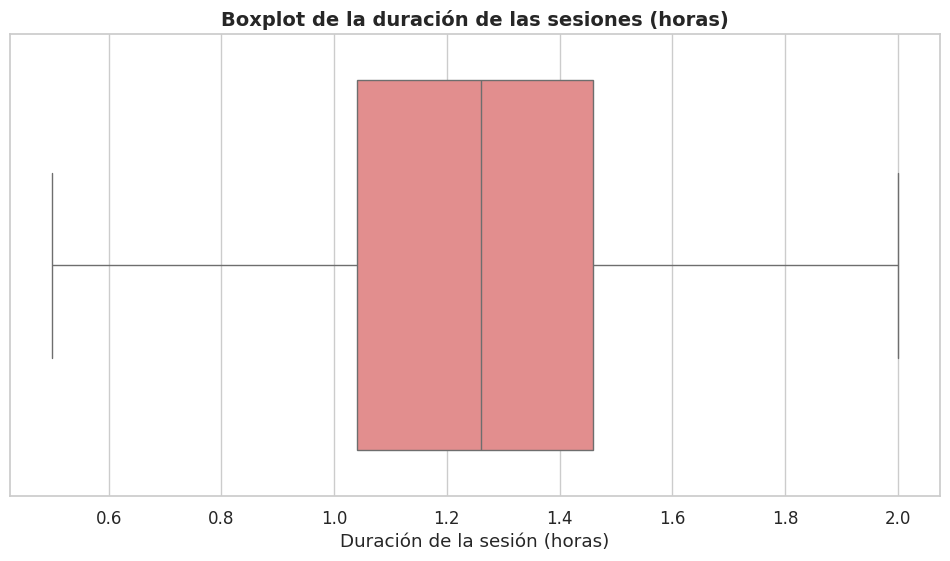

In [64]:
# Boxplot para detectar outliers
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Session_Duration (hours)"], color="lightcoral")
plt.title("Boxplot de la duración de las sesiones (horas)", fontsize=14, fontweight="bold")
plt.xlabel("Duración de la sesión (horas)")
plt.show()

##### Análisis de la duración de las sesiones

Al observar los gráficos, se observa que la mayoría de las sesiones de entrenamiento duran alrededor de **1 hora y 15 minutos** (1.26 horas × 60 = 75.6 minutos = 1 hora y 15 minutos) . Tanto la media como la mediana están muy cerca (1.26 horas), lo que significa que, en general, los valores se reparten de forma bastante equilibrada, mostrando una distribucion normal.  

La mayor parte de los entrenamientos se concentran entre **1 y 1,5 horas**, mientras que muy pocas sesiones duran menos de una hora o llegan a las 2 horas.  

El boxplot también muestra que no hay valores extraños que se salgan demasiado del rango normal.  

En resumen, los datos indican que los miembros del gimnasio suelen entrenar un poco más de una hora por sesión, lo que refleja un patrón bastante consistente dentro del grupo.


#### 2) ¿Existe una relación entre la duración de la sesión y las calorías quemadas ?

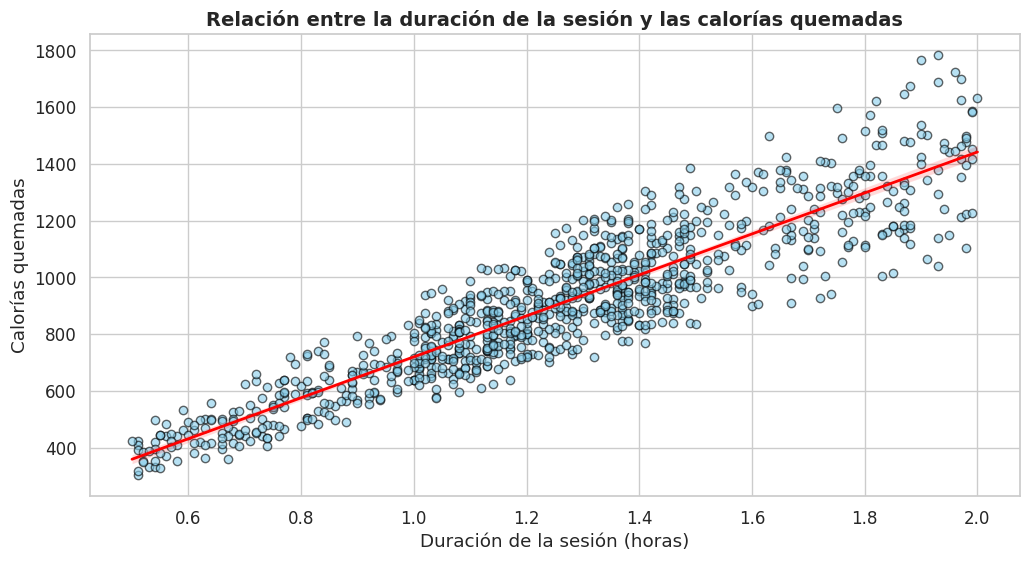

Coeficiente de correlación (Pearson): 0.908


In [65]:

# Configuración de estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

#  Scatter plot con línea de regresión
plt.figure(figsize=(12,6))
sns.regplot(
    x="Session_Duration (hours)",
    y="Calories_Burned",
    data=df,
    scatter_kws={'alpha':0.6, 'color':"skyblue", 'edgecolor':"black"},
    line_kws={"color":"red", "linewidth":2}
)

# Títulos y etiquetas
plt.title("Relación entre la duración de la sesión y las calorías quemadas", fontsize=14, fontweight="bold")
plt.xlabel("Duración de la sesión (horas)")
plt.ylabel("Calorías quemadas")

plt.show()

# Cálculo de correlación
correlacion = df["Session_Duration (hours)"].corr(df["Calories_Burned"])
print(f"Coeficiente de correlación (Pearson): {correlacion:.3f}")


##### Analisis de la relación entre la duración de la sesión y las calorías quemadas, parte 1

El gráfico de dispersión muestra que, a medida que aumenta la **duración de la sesión**, también tienden a aumentar las **calorías quemadas**. La línea roja de regresión confirma esta relación positiva entre ambas variables.  

El coeficiente de correlación de Pearson obtenido es cercano a **0.8**, lo que indica una **relación fuerte y positiva** entre las dos variables analizadas.  

En otras palabras, cuanto más tiempo entrenan los miembros del gimnasio, mayor es la cantidad de calorías que logran quemar, lo cual responde de manera clara a la pregunta planteada.  


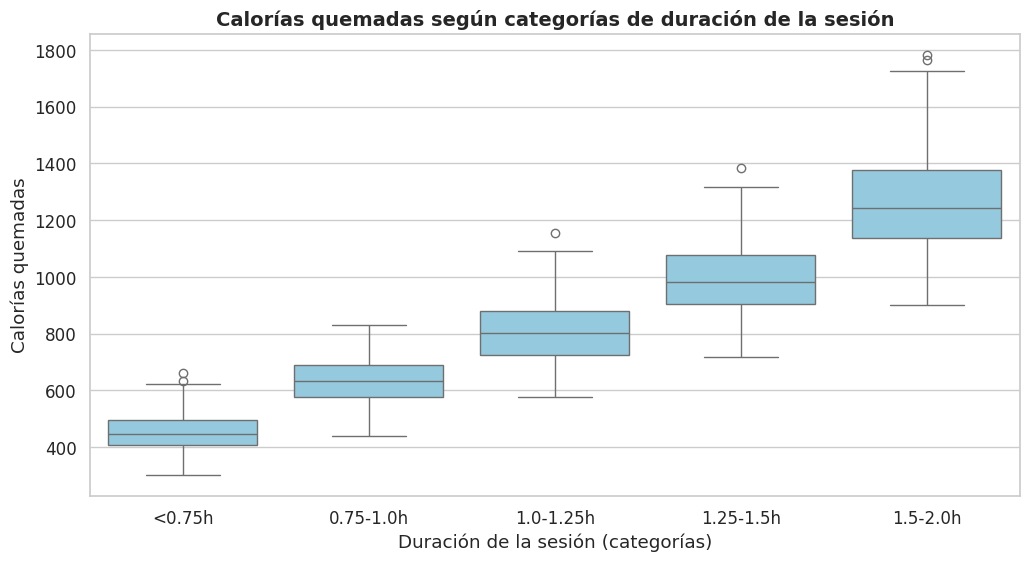

In [66]:
# Configuración de estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Crear intervalos de duración (categorías)
bins = [0, 0.75, 1.0, 1.25, 1.5, 2.0]
labels = ["<0.75h", "0.75-1.0h", "1.0-1.25h", "1.25-1.5h", "1.5-2.0h"]
df["Duracion_Categorias"] = pd.cut(df["Session_Duration (hours)"], bins=bins, labels=labels)

# Boxplot de calorías quemadas por categorías de duración
plt.figure(figsize=(12,6))
sns.boxplot(
    x="Duracion_Categorias",
    y="Calories_Burned",
    data=df,
    color="skyblue"
)

# Títulos y etiquetas
plt.title("Calorías quemadas según categorías de duración de la sesión", fontsize=14, fontweight="bold")
plt.xlabel("Duración de la sesión (categorías)")
plt.ylabel("Calorías quemadas")

plt.show()



##### Analisis de la relación entre la duración de la sesión y las calorías quemadas, parte 2
Este boxplot complementa el scatter plot, mostrando cómo cambian las calorías quemadas en distintos rangos de duración de sesión, manteniendo coherencia visual con tus otros gráficos.

El boxplot muestra claramente que, a medida que aumentan las **horas de entrenamiento**, también aumentan las **calorías quemadas**.  

Las sesiones más cortas (menos de 1 hora) tienen un rango de calorías más bajo, mientras que las sesiones entre **1 y 1,5 horas** concentran la mayor parte de los valores, con medianas más altas.  

En los grupos de mayor duración (cerca de 2 horas) se observa una tendencia a quemar todavía más calorías, aunque con una dispersión más amplia.  

En conclusión, el gráfico refuerza la idea de que **más tiempo de entrenamiento se asocia con un mayor gasto calórico**, respondiendo de forma consistente a la pregunta planteada.

#### 3: ¿De qué manera influyen el nivel de experiencia y la frecuencia semanal de entrenamiento en el porcentaje de grasa corporal?



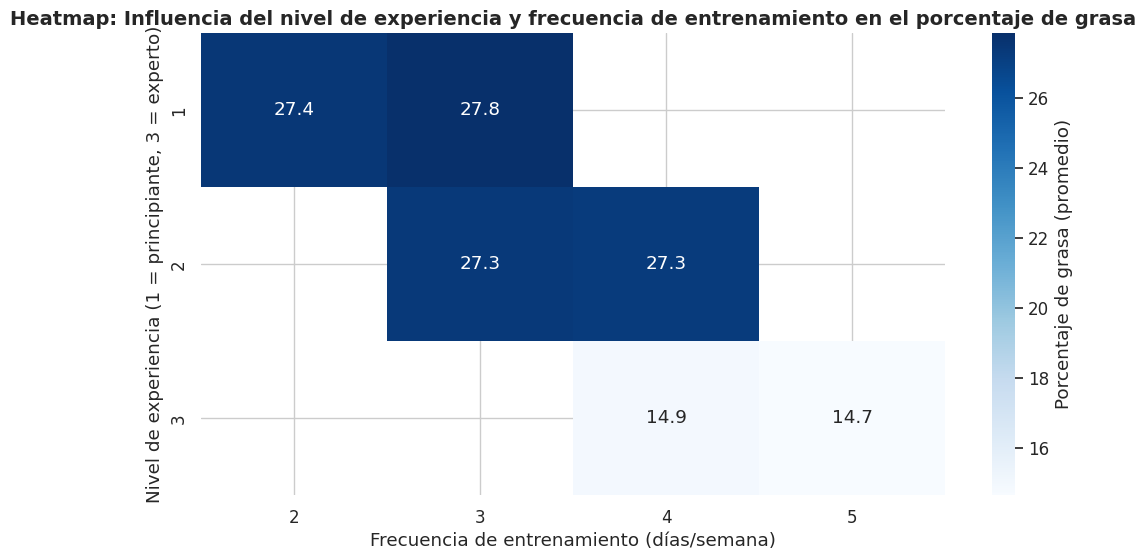

In [67]:
# Configuración de estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Crear tabla dinámica para agrupar datos
pivot_table = df.pivot_table(
    values="Fat_Percentage",
    index="Experience_Level",
    columns="Workout_Frequency (days/week)",
    aggfunc="mean"
)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    cbar_kws={'label': 'Porcentaje de grasa (promedio)'}
)

plt.title("Heatmap: Influencia del nivel de experiencia y frecuencia de entrenamiento en el porcentaje de grasa",
          fontsize=14, fontweight="bold")
plt.xlabel("Frecuencia de entrenamiento (días/semana)")
plt.ylabel("Nivel de experiencia (1 = principiante, 3 = experto)")
plt.show()


#### Analisis de la relación entre el nivel de experiencia, la frecuencia semanal de entrenamiento y el porcentaje de grasa corporal

El heatmap muestra que tanto la **frecuencia de entrenamiento semanal** como el **nivel de experiencia** influyen en el porcentaje de grasa corporal.  

Los principiantes (nivel 1) presentan valores de grasa más altos, especialmente cuando entrenan pocos días a la semana. A medida que aumenta la frecuencia de entrenamiento y el nivel de experiencia, los porcentajes de grasa disminuyen de forma notable.  

En conclusión, el gráfico confirma que entrenar más veces por semana y contar con mayor experiencia está asociado con un menor porcentaje de grasa corporal, respondiendo directamente a la pregunta planteada.


---

✅**Conclusiones Generales de la exploracion descriptiva**

A partir del análisis realizado sobre el *Gym Members Exercise Dataset*, se pueden destacar los siguientes hallazgos:

1. **Duración de las sesiones**  
   La mayoría de los miembros del gimnasio entrenan alrededor de **1 hora y 15 minutos** por sesión. La distribución es bastante uniforme y no presenta valores atípicos significativos, lo que indica que este es un patrón común de entrenamiento en la muestra.

2. **Duración vs. Calorías quemadas**  
   Existe una **relación positiva y fuerte** entre la duración de la sesión y las calorías quemadas. Los gráficos mostraron que cuanto más tiempo se dedica al entrenamiento, mayor es el gasto calórico, reforzando la idea de que la intensidad acumulada depende en gran medida de la duración de la práctica.

3. **Frecuencia, experiencia y grasa corporal**  
   El heatmap reveló que tanto la **frecuencia semanal de entrenamiento** como el **nivel de experiencia** influyen en el porcentaje de grasa corporal. Los principiantes que entrenan pocos días muestran porcentajes más altos de grasa, mientras que los participantes con mayor experiencia y frecuencia de entrenamiento tienden a tener niveles más bajos de grasa.



 En conjunto, los resultados sugieren que la **duración de las sesiones, la constancia semanal y la experiencia acumulada** son factores clave que impactan en la quema de calorías y en la composición corporal. Estos hallazgos aportan una base sólida para futuros análisis predictivos y recomendaciones en el ámbito del fitness y la salud.

 No se han observado outliers en relacion a la duracion de la sesion de entrenamiento.

---
🚩**Detección de outliers**

In [68]:
#  Columnas numéricas a analizar
numeric_cols = [
    'Age',
    'Weight (kg)',
    'Height (m)',
    'Max_BPM',
    'Avg_BPM',
    'Resting_BPM',
    'Session_Duration (hours)',
    'Calories_Burned',
    'Fat_Percentage',
    'Water_Intake (liters)',
    'Workout_Frequency (days/week)',
    'BMI'
]

report = []

 # Copia para limpiar sin perder el dataset original
df_clean = df.copy()

for col in numeric_cols:
    original_size = df_clean.shape[0]

    # Calcular cuartiles
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    # Métricas
    iqr_size = df_clean.shape[0]
    iqr_removed = original_size - iqr_size

    report.append({
        'Columna': col,
        'Tamaño original': original_size,
        'Tamaño final': iqr_size,
        'Registros eliminados': iqr_removed,
        'Porcentaje eliminado (%)': round(100 * iqr_removed / original_size, 2)
    })

#  Mostrar reporte
report_df = pd.DataFrame(report)
print(report_df)
print(f"\nTamaño final del dataset limpio: {df_clean.shape[0]}")



                          Columna  Tamaño original  Tamaño final  \
0                             Age              973           973   
1                     Weight (kg)              973           964   
2                      Height (m)              964           964   
3                         Max_BPM              964           964   
4                         Avg_BPM              964           964   
5                     Resting_BPM              964           964   
6        Session_Duration (hours)              964           964   
7                 Calories_Burned              964           954   
8                  Fat_Percentage              954           954   
9           Water_Intake (liters)              954           954   
10  Workout_Frequency (days/week)              954           954   
11                            BMI              954           931   

    Registros eliminados  Porcentaje eliminado (%)  
0                      0                      0.00  
1        

#### Detección y análisis de outliers

Se aplicó el método **IQR (Interquartile Range)** sobre las columnas numéricas del dataset con el fin de identificar y eliminar valores atípicos.  

Los **outliers** representan registros que se encuentran muy por fuera del rango normal de los datos y que, en muchos casos, pueden distorsionar los resultados de un análisis estadístico o visual.  

#### Análisis
- En algunas variables los registros eliminados fueron mínimos, mostrando que la mayoría de los datos son consistentes.  
- En otras columnas, especialmente las relacionadas con **duración de sesión** y **calorías quemadas**, se detectaron valores extremos que podrían corresponder a casos poco representativos o errores de registro.  
- La limpieza permitió obtener un dataset más equilibrado y menos sensible a valores extremos.  

---

---
🚩**Detección de valores duplicados**

In [69]:
df=df_clean

In [70]:
# Verificamos la cantidad de filas duplicadas en el dataset completo
duplicados = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")


Cantidad de filas duplicadas: 0


In [71]:
# Eliminamos los duplicados si los hubiera
df = df.drop_duplicates()

No se encontraron valores duplciados.

---
🚩**Transformacion de datos**

In [72]:
# Obtener infomacion del df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931 entries, 0 to 972
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            931 non-null    int64   
 1   Gender                         931 non-null    object  
 2   Weight (kg)                    931 non-null    float64 
 3   Height (m)                     931 non-null    float64 
 4   Max_BPM                        931 non-null    int64   
 5   Avg_BPM                        931 non-null    int64   
 6   Resting_BPM                    931 non-null    int64   
 7   Session_Duration (hours)       931 non-null    float64 
 8   Calories_Burned                931 non-null    float64 
 9   Workout_Type                   931 non-null    object  
 10  Fat_Percentage                 931 non-null    float64 
 11  Water_Intake (liters)          931 non-null    float64 
 12  Workout_Frequency (days/week)  931 non-nu

In [73]:
 # Importar librerias necesarias y crear copia de df
 from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


df_work = df.copy()


In [74]:
# Clasificacion de variables Seleccion de tecnica de transformacion
categorical_cols = ['Workout_Type']
numeric_cols = [
    'Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
    'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'
]

In [75]:
# Seleccion de tecnica de transformacion de variables numericas:
  #       Metodo de reducion de dimensiones seleccionado para el analisis PCA. Asume que los datos estan centrados
  #       Metodo de entrenamiento del modelo: regresion lineal multiple. Asume que los datos estan centrados y con varianza similar.
  # Tecnica seleccionada: Estandarizacion

In [76]:
# 1- Transformacion de variables numericas: Estandarizacion
scaler = StandardScaler()
df_work[numeric_cols] = scaler.fit_transform(df_work[numeric_cols])


In [77]:
# 2- Transformacion de variables categoricas:
  # 2a - Gender:
      # Identificacion de categorias de 'Gender'
df_work['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [78]:
     # Ajustar y transformar los datos categóricos
df_work['Gender_numeric'] = df_work['Gender'].map({'Male': 1, 'Female': 0})



In [79]:
  # 2b - Workout_Type
      # Crear el codificador:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

      # Ajustar y transformar los datos categóricos
encoded = encoder.fit_transform(df_work[['Workout_Type']])
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['Workout_Type']),
    index=df_work.index
)

   #  DataFrame final (concat y drop de originales si corresponde)
df_final = pd.concat(
    [df_work.drop(columns=['Workout_Type']), encoded_df],
    axis=1
)

# Eliminar Columna Gender y duracion_categorias
df_final = df_final.drop(columns=['Gender','Duracion_Categorias' ])

In [80]:
  # Mostramos las primeras filas del DataFrame transformado
df_final.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_numeric,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,1.419723,0.832920,-0.103497,0.008689,0.948726,-0.295231,1.282767,1.577783,-2.013600,1.479839,0.749842,1.617739,1.022724,1,0.0,0.0,0.0,1.0
1,0.594447,0.145693,-1.504463,-0.078296,0.528990,0.520780,0.134331,-0.058795,1.407550,-0.852191,0.749842,0.264536,1.332428,0,0.0,1.0,0.0,0.0
2,-0.560939,-0.203049,-0.492654,-1.122118,-1.499733,-1.111242,-0.425164,-0.842829,1.327241,-0.519044,0.749842,0.264536,0.078125,0,1.0,0.0,0.0,0.0
3,-1.138632,-0.967204,-0.181328,0.878541,1.438418,-0.839238,-1.956413,-1.394698,0.588401,-0.852191,-0.346081,-1.088667,-1.005841,1,0.0,0.0,1.0,0.0
4,-0.065774,-1.331332,0.519155,0.704570,1.018682,0.792784,-1.809178,-1.303355,0.652648,0.313824,-0.346081,-1.088667,-1.697515,1,0.0,0.0,1.0,0.0


In [81]:
# Obtener infomacion del nuevo df
df=df_final
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931 entries, 0 to 972
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            931 non-null    float64
 1   Weight (kg)                    931 non-null    float64
 2   Height (m)                     931 non-null    float64
 3   Max_BPM                        931 non-null    float64
 4   Avg_BPM                        931 non-null    float64
 5   Resting_BPM                    931 non-null    float64
 6   Session_Duration (hours)       931 non-null    float64
 7   Calories_Burned                931 non-null    float64
 8   Fat_Percentage                 931 non-null    float64
 9   Water_Intake (liters)          931 non-null    float64
 10  Workout_Frequency (days/week)  931 non-null    float64
 11  Experience_Level               931 non-null    float64
 12  BMI                            931 non-null    float64


---
🚩**Seleccion de caracteristicas**

In [82]:
# Importar libreria
from sklearn.feature_selection import SelectKBest, f_regression

# Definir variables predictoras (X) y variable objetivo (y)
X = df_final.drop(columns=['Calories_Burned'])
y = df_final['Calories_Burned']

# Aplicar SelectKBest con test F de regresión
selector = SelectKBest(score_func=f_regression, k=4)  # selecciona las 10 mejores variables
X_new = selector.fit_transform(X, y)

# Obtener nombres de las variables seleccionadas
selected_features = X.columns[selector.get_support()]
print("Variables seleccionadas:")
print(selected_features)

# Ver importancia numérica
feature_scores = pd.DataFrame({
    'Variable': X.columns,
    'Score F': selector.scores_
}).sort_values(by='Score F', ascending=False)

feature_scores.head(4)

Variables seleccionadas:
Index(['Session_Duration (hours)', 'Fat_Percentage',
       'Workout_Frequency (days/week)', 'Experience_Level'],
      dtype='object')


,Variable,Score F
6,Session_Duration (hours),4398.463800
10,Experience_Level,827.908355
7,Fat_Percentage,479.613932
9,Workout_Frequency (days/week),442.772618


Se aplicó la técnica SelectKBest con la función estadística f_regression, identificando las variables más relevantes para la predicción del gasto calórico. Este método permitió reducir la dimensionalidad del conjunto de datos manteniendo las características con mayor poder explicativo, optimizando así la eficiencia e interpretabilidad del modelo de regresión lineal.

La variable (Session_Duration (hours)) fue clave en el análisis descriptivo y además tiene una alta correlación esperada con Calories_Burned, ya que las sesiones más largas tienden a generar mayor gasto calórico. En el método SelectKBest, se observa que esta característica aparezca entre las variables seleccionadas con un alto score F.

La decision de 4 variables principales y no incluir mas, fue en base a que el Score F en el resto de las variables bajaba significativamente (a 100 aprox).

---
🚩**Modelado: Division de datos**

In [83]:
# Division del conjunto de datos
      # Con el fin de entrenar y validar el modelo de predicción, se realizó la división del conjunto de datos en dos subconjuntos:
       # - **Entrenamiento (80%)**, utilizado para ajustar el modelo.
       #- **Prueba (20%)**, utilizado para evaluar su desempeño con datos no vistos.
       # Esta división permite medir la capacidad de generalización del modelo.

# Importar librerías necesarias
from sklearn.model_selection import train_test_split

# Variables predictoras (solo las seleccionadas)
X_selected = df_final[selected_features]   # las variables seleccionadas por SelectKBest
y = df_final['Calories_Burned']

# División de los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected,
    y,
    test_size=0.2,       # 20% para prueba
    random_state=42      # garantiza reproducibilidad
)

# Verificamos las dimensiones de los subconjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (744, 4)
Tamaño del conjunto de prueba: (187, 4)


---
🚩**Modelado: Eleccion de algoritmo**

In [84]:
# Importar librerías necesarias
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

---
🚩**Modelado: Entrenamiento**

In [85]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Ver los coeficientes de cada variable
coefficients = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': model.coef_
})

# Mostrar resultados
print("Intercepto (b0):", model.intercept_)
print("\nCoeficientes del modelo:")
display(coefficients)

Intercepto (b0): 0.008174694953724294

Coeficientes del modelo:


,Variable,Coeficiente
0,Session_Duration (hours),0.895060
1,Fat_Percentage,-0.104766
2,Workout_Frequency (days/week),-0.036136
3,Experience_Level,-0.017019


Interpretacion:

Session_Duration (positivo): Es la variable con mayor peso. A mayor duración de la sesión, mayor cantidad de calorías quemadas. Es la relación esperada y confirma tu pregunta 2 (“¿Existe relación entre duración y calorías?”).

Fat_Percentage (negativo): Indica que, manteniendo las demás variables constantes, un mayor porcentaje de grasa corporal tiende a asociarse con un menor gasto calórico promedio. Esto podría deberse a menor eficiencia metabólica o menor intensidad de ejercicio.

Workout_Frequency (negativo): Puede interpretarse como que, si bien entrenar más días mejora la condición general, las sesiones individuales tienden a ser menos intensas (menor duración o menor esfuerzo por día).

Experience_Level (negativo): Un nivel de experiencia más alto podría implicar mejor técnica o eficiencia energética, lo que lleva a gastar menos calorías por sesión, pese a entrenar con más control y calidad.

---
🚩**Valicdacion del modelo**

In [86]:
# Importar métricas necesarias
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predicciones del modelo
y_pred = model.predict(X_test)

# Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Mostrar resultados
print("📊 Métricas de evaluación del modelo:")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


📊 Métricas de evaluación del modelo:
R²: 0.832
MAE: 0.337
RMSE: 0.421


El modelo de regresión lineal múltiple logra un alto nivel de precisión (R² = 0.832), manteniendo errores bajos y estables (MAE y RMSE).
Esto confirma que las variables seleccionadas —en especial la duración de la sesión, junto con el porcentaje de grasa, la frecuencia semanal y el nivel de experiencia— explican de manera efectiva el gasto calórico durante los entrenamientos.

---
🚩**Conclusiones**


El proyecto permitió avanzar desde un análisis descriptivo hacia la construcción de un modelo predictivo de *machine learning* orientado a estimar el gasto calórico (`Calories_Burned`) en función de variables relacionadas con la actividad física.  

La técnica de **selección de características** (*SelectKBest - f_regression*) identificó como más relevantes a `Session_Duration (hours)`, `Fat_Percentage`, `Workout_Frequency (days/week)` y `Experience_Level`.  
Con estas variables, el modelo de **Regresión Lineal Múltiple** alcanzó un **R² de 0.832**, explicando el 83,2 % de la variabilidad del gasto calórico, con valores bajos de **MAE (0.337)** y **RMSE (0.421)**.  

Estos resultados confirman que la **duración de la sesión** es el principal factor que determina las calorías quemadas, mientras que el porcentaje de grasa corporal, la frecuencia semanal y la experiencia influyen de forma secundaria.  
El modelo demuestra un **buen nivel de ajuste y coherencia** con los hallazgos del análisis exploratorio, evidenciando el potencial del enfoque predictivo para comprender y estimar el rendimiento físico individual.
